In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab/real_estate_visualization') 

In [ ]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib
from matplotlib import pyplot as plt
import warnings
import numpy as np
import matplotlib.dates as mdates

In [ ]:
df_build = pd.read_csv('건축허가현황.csv', index_col=0)
df_money = pd.read_csv('국내건설수주액.csv', index_col=0)
df_house = pd.read_csv('미분양주택현황.csv', index_col=0)
df_apart = pd.read_csv('아파트 실거래가격지수.csv', index_col=0)
df_hmoney = pd.read_csv('유형별_주택월세통합가격지수.csv', index_col=0)
df_build2 = pd.read_csv('주택건설인허가실적.csv', index_col=0)
df_kb1 = pd.read_csv('주택매매가격지수(KB).csv', index_col=0)
df_kb2 = pd.read_csv('주택전세가격지수(KB).csv', index_col=0)
df_region = pd.read_csv('지역별_지가변동률.csv', index_col=0)

In [ ]:
df_build.head() #건축허가현황

,연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],연면적-자재별[㎡],연면적-용도별[㎡],동수-철근·철골조[동수],동수-조적조[동수],동수-목조[동수],동수-기타(자재별)[동수],동수-주거용[동수],동수-상업용[동수],동수-공업용[동수],동수-교육및사회용[동수],동수-기타(용도별)[동수],동수-자재별[동수],동수-용도별[동수]
2000-08-01,3898712.0,122063.0,5229.0,287185.0,1812355.0,1088979.0,687577.0,0.0,724278.0,4313189.0,4313189.0,4319.0,1216.0,58.0,1078.0,2905.0,2008.0,741.0,0.0,1017.0,6671.0,6671.0
2000-09-01,3055754.0,113586.0,5918.0,236449.0,1273430.0,1014900.0,702592.0,0.0,420785.0,3411707.0,3411707.0,3910.0,1128.0,70.0,793.0,2653.0,1756.0,652.0,0.0,840.0,5901.0,5901.0
2000-10-01,4104565.0,134648.0,8006.0,314620.0,1908535.0,1095874.0,1011477.0,0.0,545953.0,4561839.0,4561839.0,4970.0,1290.0,61.0,1183.0,3246.0,2264.0,874.0,0.0,1120.0,7504.0,7504.0
2000-11-01,4337103.0,108212.0,7727.0,283128.0,2415543.0,1164943.0,613744.0,0.0,541940.0,4736170.0,4736170.0,4497.0,1128.0,62.0,1088.0,2801.0,2050.0,816.0,0.0,1108.0,6775.0,6775.0
2000-12-01,6027008.0,161879.0,26079.0,453178.0,3450325.0,1412322.0,1069299.0,0.0,736198.0,6668144.0,6668144.0,3581.0,941.0,70.0,986.0,2080.0,1619.0,748.0,0.0,1131.0,5578.0,5578.0


In [ ]:
df_money.head(2) #국내건설수주액

,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],민자[백만원],건축[백만원],주택[백만원],사무실 및 점포[백만원],공장 및 창고[백만원],관공서[백만원],기타[백만원],토목[백만원],치산 및 치수[백만원],농림 및 수산[백만원],도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,NaN,2231.0,186.0,928.0,862.0,239.0,16.0,10361.0,1.0,225.0,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,NaN,3762.0,246.0,847.0,1955.0,85.0,629.0,4468.0,5.0,144.0,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN


In [ ]:
df_house.head(2) #미분양주택현황


,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN


In [ ]:
df_apart.head(2) #아파트 실거래가격지수

,도심권[2017.11=100],동북권[2017.11=100],동남권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100],울산[2017.11=100],세종[2017.11=100],경기[2017.11=100],강원[2017.11=100],충북[2017.11=100],충남[2017.11=100],서북권[2017.11=100],서남권[2017.11=100],전북[2017.11=100],전남[2017.11=100],경북[2017.11=100],경남[2017.11=100],제주[2017.11=100],지방광역시[2017.11=100],지방도[2017.11=100],전국[2017.11=100],서울[2017.11=100],수도권[2017.11=100],지방[2017.11=100]
2006-01-01,59.3,59.0,62.0,49.7,62.5,62.4,54.2,76.1,48.8,69.8,69.2,61.2,65.2,75.4,57.1,59.9,57.0,51.0,66.3,63.0,38.7,55.8,62.3,62.0,60.6,65.4,59.1
2006-02-01,58.1,59.3,63.8,49.4,62.6,62.8,53.9,75.6,48.9,69.7,70.5,61.8,66.4,76.2,57.2,61.1,57.3,50.7,66.2,62.9,37.6,55.7,62.6,62.7,61.7,66.6,59.2


In [ ]:
df_hmoney.head(2) #유형별 주택월세통합가격지수

,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],종합-대구[2017.11=100],종합-광주[2017.11=100],종합-대전[2017.11=100],종합-울산[2017.11=100],종합-세종[2017.11=100],종합-강원[2017.11=100],종합-충북[2017.11=100],종합-충남[2017.11=100],종합-전북[2017.11=100],종합-전남[2017.11=100],종합-경북[2017.11=100],종합-경남[2017.11=100],종합-제주[2017.11=100],종합-6대광역시[2017.11=100],종합-9개도[2017.11=100],아파트-전국[2017.11=100],아파트-수도권[2017.11=100],아파트-지방[2017.11=100],아파트-5대광역시[2017.11=100],아파트-8개도[2017.11=100],아파트-서울[2017.11=100],아파트-경기[2017.11=100],아파트-인천[2017.11=100],아파트-부산[2017.11=100],아파트-대구[2017.11=100],아파트-광주[2017.11=100],아파트-대전[2017.11=100],아파트-울산[2017.11=100],아파트-세종[2017.11=100],아파트-강원[2017.11=100],아파트-충북[2017.11=100],...,연립다세대-부산[2017.11=100],연립다세대-대구[2017.11=100],연립다세대-광주[2017.11=100],연립다세대-대전[2017.11=100],연립다세대-울산[2017.11=100],연립다세대-세종[2017.11=100],연립다세대-강원[2017.11=100],연립다세대-충북[2017.11=100],연립다세대-충남[2017.11=100],연립다세대-전북[2017.11=100],연립다세대-전남[2017.11=100],연립다세대-경북[2017.11=100],연립다세대-경남[2017.11=100],연립다세대-제주[2017.11=100],연립다세대-6대광역시[2017.11=100],연립다세대-9개도[2017.11=100],단독주택-전국[2017.11=100],단독주택-수도권[2017.11=100],단독주택-지방[2017.11=100],단독주택-5대광역시[2017.11=100],단독주택-8개도[2017.11=100],단독주택-서울[2017.11=100],단독주택-경기[2017.11=100],단독주택-인천[2017.11=100],단독주택-부산[2017.11=100],단독주택-대구[2017.11=100],단독주택-광주[2017.11=100],단독주택-대전[2017.11=100],단독주택-울산[2017.11=100],단독주택-세종[2017.11=100],단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
2015-06-01,100.2,99.6,100.8,100.3,101.0,99.9,99.4,99.1,99.7,100.6,100.2,100.5,NaN,107.6,99.2,101.2,101.2,99.1,100.0,101.7,103.1,98.0,100.0,100.3,100.4,99.5,101.2,100.4,101.8,100.0,99.3,99.0,99.4,101.2,100.5,100.3,101.4,110.5,98.6,101.0,...,99.6,99.9,100.4,100.8,101.1,101.5,99.4,101.5,100.7,99.9,100.6,100.8,101.7,97.6,99.6,99.8,100.1,100.0,100.2,100.3,100.1,100.1,100.1,99.9,100.4,99.2,99.4,101.2,102.7,99.5,100.1,101.6,99.4,99.3,100.3,100.2,100.8,98.1,100.2,100.1
2015-07-01,100.2,99.6,100.8,100.4,101.0,99.9,99.5,99.2,99.7,100.8,100.2,100.5,NaN,107.6,99.3,101.2,101.2,99.1,100.0,101.7,103.1,98.1,100.1,100.3,100.4,99.5,101.2,100.4,101.8,100.0,99.4,99.0,99.3,101.4,100.5,100.3,101.5,110.4,98.7,101.0,...,99.7,100.0,100.2,100.8,101.1,101.5,99.4,101.4,100.8,99.9,100.7,100.8,101.8,97.7,99.7,99.8,100.2,100.0,100.2,100.4,100.2,100.1,100.1,99.9,100.4,99.5,99.4,101.1,102.7,99.5,100.1,101.6,99.4,99.3,100.4,100.3,100.8,98.2,100.3,100.2


In [ ]:
df_build2.head(2) #주택건설인허가실적

,전국[호],부산[호],충북[호],충남[호],대구[호],대전[호],강원[호],광주[호],경기[호],인천[호],제주[호],전북[호],전남[호],경북[호],경남[호],민간부문[호],공공부문[호],부문별[호],세종[호],서울[호],울산[호]
2007-01-01,12038.0,455.0,188.0,1004.0,818.0,55.0,452.0,1022.0,2647.0,69.0,132.0,888.0,206.0,698.0,1691.0,11718.0,320.0,12038.0,NaN,1530.0,183.0
2007-02-01,29789.0,1554.0,493.0,2310.0,3549.0,89.0,642.0,2200.0,5517.0,185.0,232.0,1490.0,700.0,2942.0,4206.0,28311.0,1478.0,29789.0,NaN,2324.0,1356.0


In [ ]:
df_kb1.head(2) #주택매매가격지수(kb)

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044


In [ ]:
df_kb2.head(2) #주택전세가격지수(kb)

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066


In [ ]:
df_region.head(2) #지역별 지가변동률

,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.14,0.150
2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.16,0.111


In [ ]:
from matplotlib import rc
font_path="./malgun.ttf"
font_name=fm.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)
plt.rcParams['axes.grid'] = True

In [ ]:
warnings.filterwarnings('ignore')

def show_graph(df):
  index = pd.to_datetime(df.index)
  cols = df.columns.values

  fig, ax = plt.subplots(figsize = (15,3))
  ax.plot(index, df.values)

  fig.autofmt_xdate()
  plt.legend(cols, bbox_to_anchor=(1.01,1))

In [ ]:
def show_graph2(df, new_data):
  index = pd.to_datetime(df.index)
  cols = df.columns.values

  fig, ax = plt.subplots(figsize = (15,3))
  ax.plot(index, new_data)

  fig.autofmt_xdate()
  plt.legend(cols, bbox_to_anchor=(1.01,1))

In [ ]:
def show_bytype(df, cols_bytype, new_data):
  index = pd.to_datetime(df.index)
  cols = df.columns.values

  arr_bytype = np.zeros(shape=(df.shape[0], len(cols)))

  for i, col in enumerate(cols):
    for j, type1 in enumerate(cols_bytype):
      if col == type1:
        arr_bytype[:,j] = new_data[:,i]

  fig, ax = plt.subplots(figsize=(15,3))
  ax.margins(x=0.02, y=0.03)
  ax.plot(index, arr_bytype)

  fig.autofmt_xdate()
  plt.legend(cols_bytype, loc=0, bbox_to_anchor=(1.01,1))

In [ ]:
def show_bytype_og(df, cols_bytype):
  index = pd.to_datetime(df.index)
  cols = df.columns.values

  arr_bytype = np.zeros(shape=(df.shape[0], len(cols)))

  for i, col in enumerate(cols):
    for j, type1 in enumerate(cols_bytype):
      if col == type1:
        arr_bytype[:,j] = df.values[:,i]

  fig, ax = plt.subplots(figsize=(15,3))
  ax.margins(x=0.02, y=0.03)
  ax.plot(index, arr_bytype)

  fig.autofmt_xdate()
  plt.legend(cols_bytype, loc=0, bbox_to_anchor=(1.01,1))

In [ ]:
def get_ratio(df):
  rtn_arr = np.zeros(shape=df.values.shape)
  values = df.values
  for i, row in enumerate(values):
    if i == 0:
      continue
    rtn_arr[i] = row/values[i-1] - 1
  return rtn_arr

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,159 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.grid'] = True 

# 1. 가격 관련 지수
지역별 지가변동률을 확인합니다.
- 전체적으로 2009년에 지가가 대폭 떨어졌습니다.
- 2016년 제주도의 지가가 대폭 상승했습니다.
- 세종시는 2020년 말부터 지가가 대폭 상승합니다.

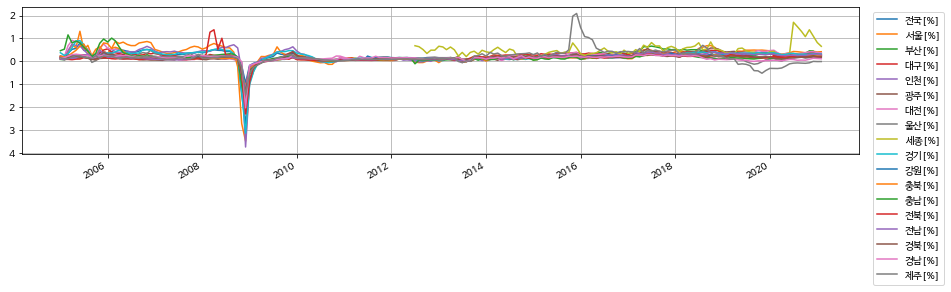

In [ ]:
show_graph(df_region)

이 데이터의 지가변동률은 전월 대비 상승률을 나타내고 있습니다. 시작 지점인 2005년 1월 1일에 동일한 가격의 땅을 샀다면 2021년 2월 1일에 가장 수익이 큰 지역은 어디일까요?

- 2005년에 세종시 데이터는 없기 때문에 제외합니다.

In [ ]:
df_2005 = df_region.iloc[:,1:].drop('세종[%]', axis=1)
money_2005 = np.ones(shape=df_2005.values.shape)
for i, row in enumerate(df_2005.values):
  if i == 0:
    continue
  money_2005[i] = money_2005[i-1]*(1+row/100)

1이라는 금액에 2005년 1월 1일에 샀다고 가정했을 때 변동된 지가는 다음과 같습니다.
대폭 하락했던 2009년에 사더라도 올랐을 걸로 보이네요.

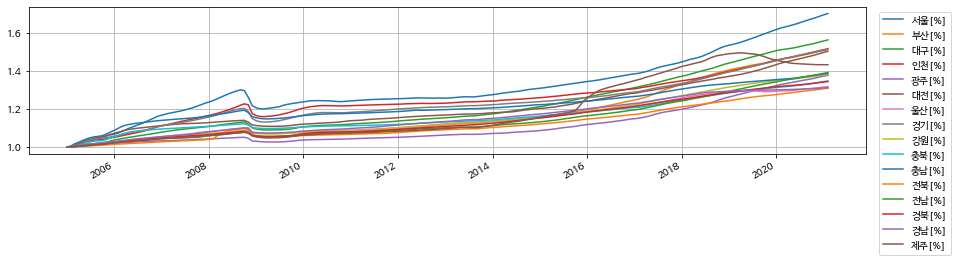

In [ ]:
show_graph2(df_2005, money_2005)

당연하게도 서울의 지가가 제일 많이 올랐습니다.
물론 서울 내에서도 지역마다 다르겠지만 2005년에 비해 평균적으로 1.7배가 올랐습니다.
오른 정도로 정렬해서 보면 서울, 대구, 경기, 부산 순이고, 지가가 원금보다 내려간 지역은 없습니다.

[('전북', 1.3085454813889836), ('경남', 1.3119252232104253), ('울산', 1.3174124084211885), ('경북', 1.3438719392155907), ('충북', 1.3470346202029857), ('광주', 1.376178962559974), ('강원', 1.3813340257536424), ('충남', 1.386505318057887), ('전남', 1.3912296491389817), ('제주', 1.4320587159360598), ('대전', 1.5026077667829352), ('인천', 1.5124429228167653), ('부산', 1.5153752950115078), ('경기', 1.5162802827854507), ('대구', 1.5624779152972486), ('서울', 1.7013069103288752)]


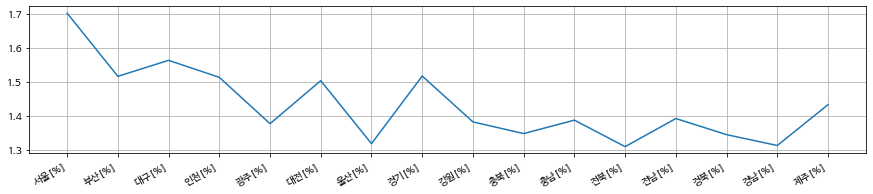

In [ ]:
index = pd.to_datetime(df_2005.index)
cols = df_2005.columns.values

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(cols, money_2005[-1])

fig.autofmt_xdate()

values1 = []
for i, col in enumerate(cols):
  values1.append((col.replace('[%]',''), money_2005[-1][i]))
values1.sort(key=lambda x:x[1])

print(values1)

아파트 실거래가격지수를 확인합니다.

In [ ]:
print(len(df_apart.values))
df_apart.isnull().sum()

181


도심권[2017.11=100]        0
동북권[2017.11=100]        0
동남권[2017.11=100]        0
부산[2017.11=100]         0
대구[2017.11=100]         0
인천[2017.11=100]         0
광주[2017.11=100]         0
대전[2017.11=100]         0
울산[2017.11=100]         0
세종[2017.11=100]         0
경기[2017.11=100]         0
강원[2017.11=100]         0
충북[2017.11=100]         0
충남[2017.11=100]         0
서북권[2017.11=100]        0
서남권[2017.11=100]        0
전북[2017.11=100]         0
전남[2017.11=100]         0
경북[2017.11=100]         0
경남[2017.11=100]         0
제주[2017.11=100]         0
광역시[2017.11=100]      181
지방광역시[2017.11=100]      0
지방도[2017.11=100]        0
전국[2017.11=100]         0
서울[2017.11=100]         0
수도권[2017.11=100]        0
지방[2017.11=100]         0
dtype: int64

In [ ]:
df_apart = df_apart.drop('광역시[2017.11=100]', axis=1)

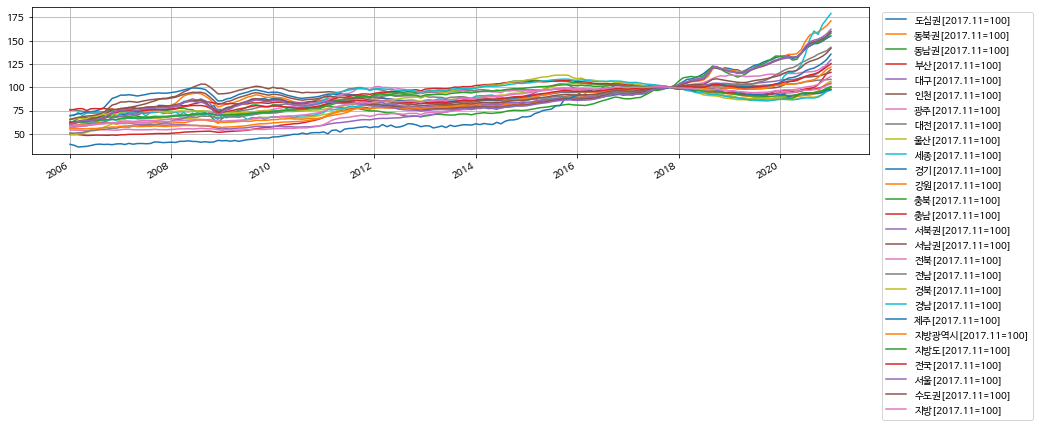

In [ ]:
show_graph(df_apart)

시작 시점인 2006년 1월 1일에 비해 2021년 1월 1일의 아파트 실거래지수는 다음과 같습니다.
동북권, 서북권, 서울 순으로 아파트 실거래지수가 많이 올랐습니다.



[('동북권', 2.9033898305084747), ('서북권', 2.7933450087565674), ('서울', 2.6765676567656764), ('서남권', 2.669449081803005), ('도심권', 2.615514333895447), ('세종', 2.568767908309456), ('동남권', 2.55), ('제주', 2.521963824289405), ('부산', 2.334004024144869), ('광주', 2.302583025830258), ('울산', 2.182377049180328), ('지방광역시', 2.1810035842293907), ('수도권', 2.168195718654434), ('전남', 2.1294117647058823), ('대구', 2.072), ('전국', 2.02258064516129), ('경기', 1.9595375722543351), ('인천', 1.908653846153846), ('지방', 1.8883248730964466), ('대전', 1.8791064388961893), ('전북', 1.8192982456140352), ('강원', 1.6258169934640523), ('지방도', 1.6195826645264848), ('경남', 1.5396825396825398), ('충북', 1.5322085889570551), ('경북', 1.4766214177978885), ('충남', 1.3846153846153846)]


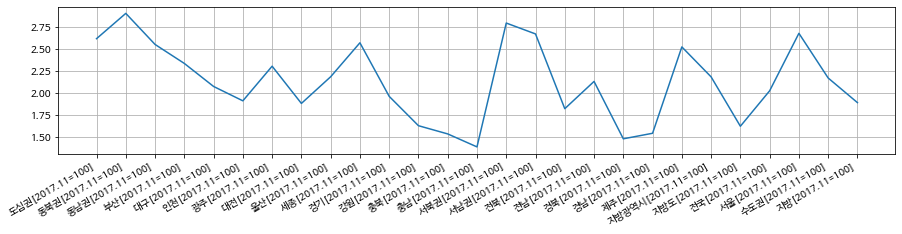

In [ ]:
based_2006 = df_apart.values[-1]/df_apart.values[0]
cols = df_apart.columns.values

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(cols, based_2006)

fig.autofmt_xdate()

values1 = []
for i, col in enumerate(cols):
  values1.append((col.replace('[2017.11=100]',''), based_2006[i]))
values1.sort(key=lambda x: -x[1])

print(values1)

아파트 실거래가 변동이 가장 컸을 때는 언제일까요?

In [ ]:
apart_change = get_ratio(df_apart)

지역별로 변동률의 차이가 납니다.
전체적으로 전월 대비 아파트 실거래가 변동률은 지가와 같이 2009년에 크게 흔들리는 모습을 보입니다.
세종시는 지가변동률과 마찬가지로 2020년 말 크게 상승합니다.

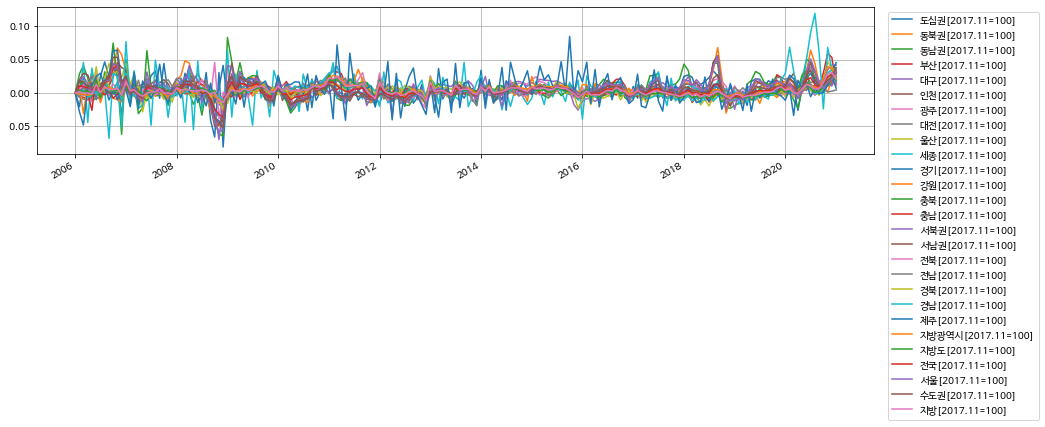

In [ ]:
show_graph2(df_apart, apart_change)

### **주택매매가격지수를 확인합니다.**

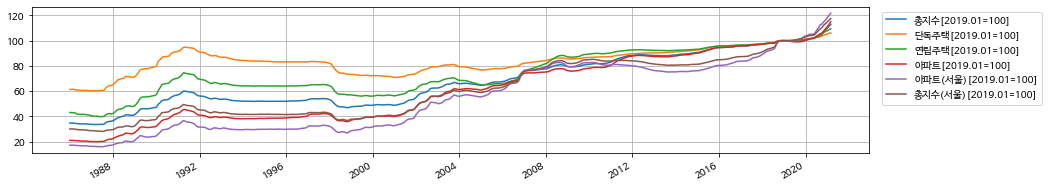

In [ ]:
show_graph(df_kb1)

최근 5년 이내의 데이터를 확대해서 살펴보겠습니다.
단독주택은 변동이 비교적 적은 편이고, 서울 아파트와 서울 총지수가 많이 상승하는 걸 볼 수 있습니다.

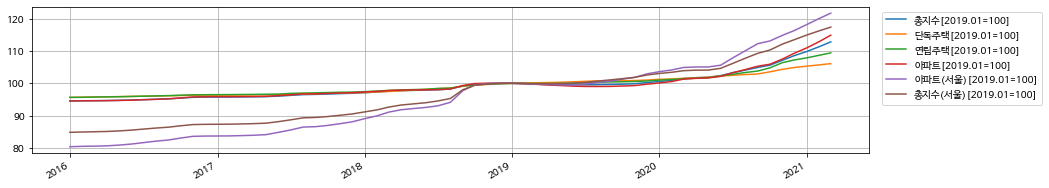

In [ ]:
df_kb1_last_5 = df_kb1[(df_kb1.index >= '2016-01-01')]
show_graph(df_kb1_last_5)

시작 시점인 1986년 1월 1일에 비해 2021년 3월 1일의 주택매매가격지수는 다음과 같습니다.
서울의 아파트가 7배가 넘게 올랐고, 시작 지점 제일 높은 가격이었던 단독주택은 제일 낮은 상승률을 보였습니다.




[3.25605956 1.72942442 2.54163473 5.47899681 7.09619309 3.90796831]
[('아파트(서울)', 7.096193085757594), ('아파트', 5.478996805416488), ('총지수(서울)', 3.907968313140727), ('총지수', 3.256059556786704), ('연립주택', 2.5416347292871575), ('단독주택', 1.729424421732114)]


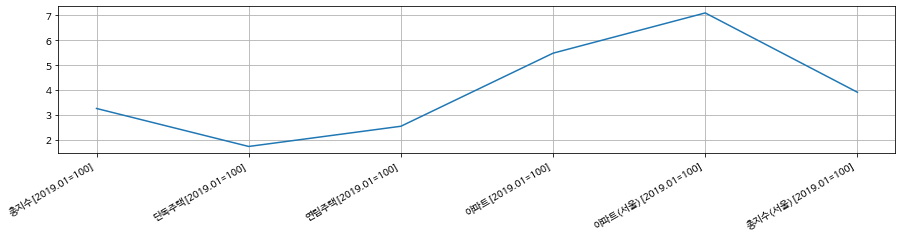

In [ ]:
based_1986 = df_kb1.values[-1] / df_kb1.values[0]
cols = df_kb1.columns.values

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(cols, based_1986)

fig.autofmt_xdate()

values1 = []
for i, col in enumerate(cols):
  values1.append((col.replace('[2019.01=100]',''), based_1986[i]))
values1.sort(key=lambda x: -x[1])

print(based_1986)
print(values1)

1992년과 1998년에 하락이 크게 옵니다. 98년도는 IMF 때문인 걸로 추정됩니다.
지역별 아파트 실거래가 지수와는 달리, 주택구분별로 변동률의 차이는 상대적으로 적습니다.

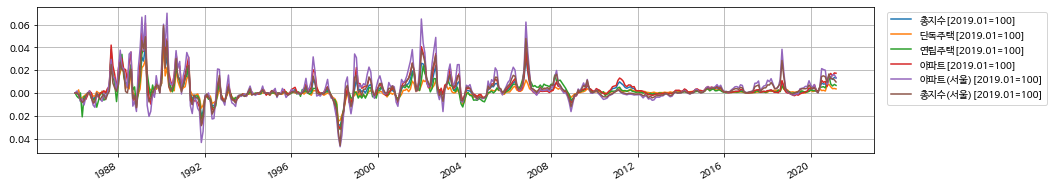

In [ ]:
kb1_change = get_ratio(df_kb1)
show_graph2(df_kb1, kb1_change)

### **주택전세가격지수를 확인합니다**

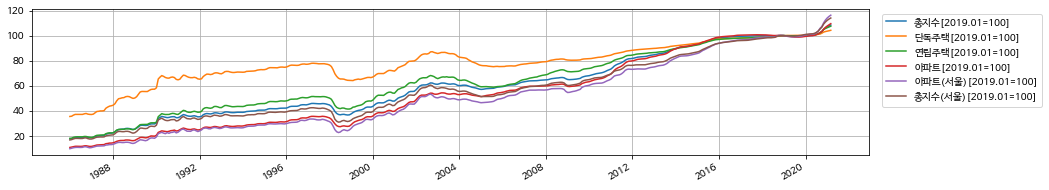

In [ ]:
show_graph(df_kb2)


주택매매가격지수를 볼 때, 1992년과 1998년에 하락이 크게 오지만, 전세 가격은 1998년에만 크게 떨어집니다.
주택매매가격지수에서 상승률이 컸던 1990년도 쯤에도 역시 전세 가격이 크게 오릅니다.
2004년 이후에는 매매가격 변동에 비해 전세 가격의 변동은 적은 편입니다.
전세 가격 역시 지역별 아파트 실거래가 지수와는 달리, 주택구분별로 변동률의 차이는 상대적으로 적습니다.

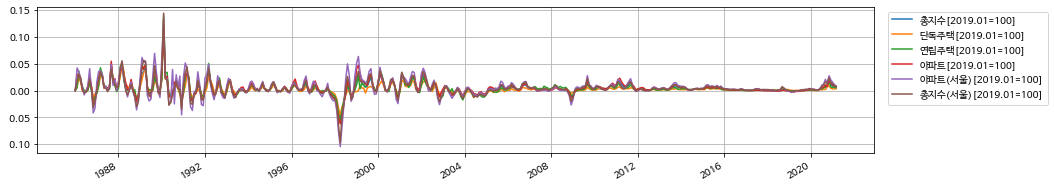

In [ ]:
# 변동률 계산
kb2_change = get_ratio(df_kb2)
show_graph2(df_kb2, kb2_change)

### **주택월세가격지수를 확인합니다**

- 지역과 주택유형별로 된 데이터이다 보니 분류별 차이가 큰 편입니다.

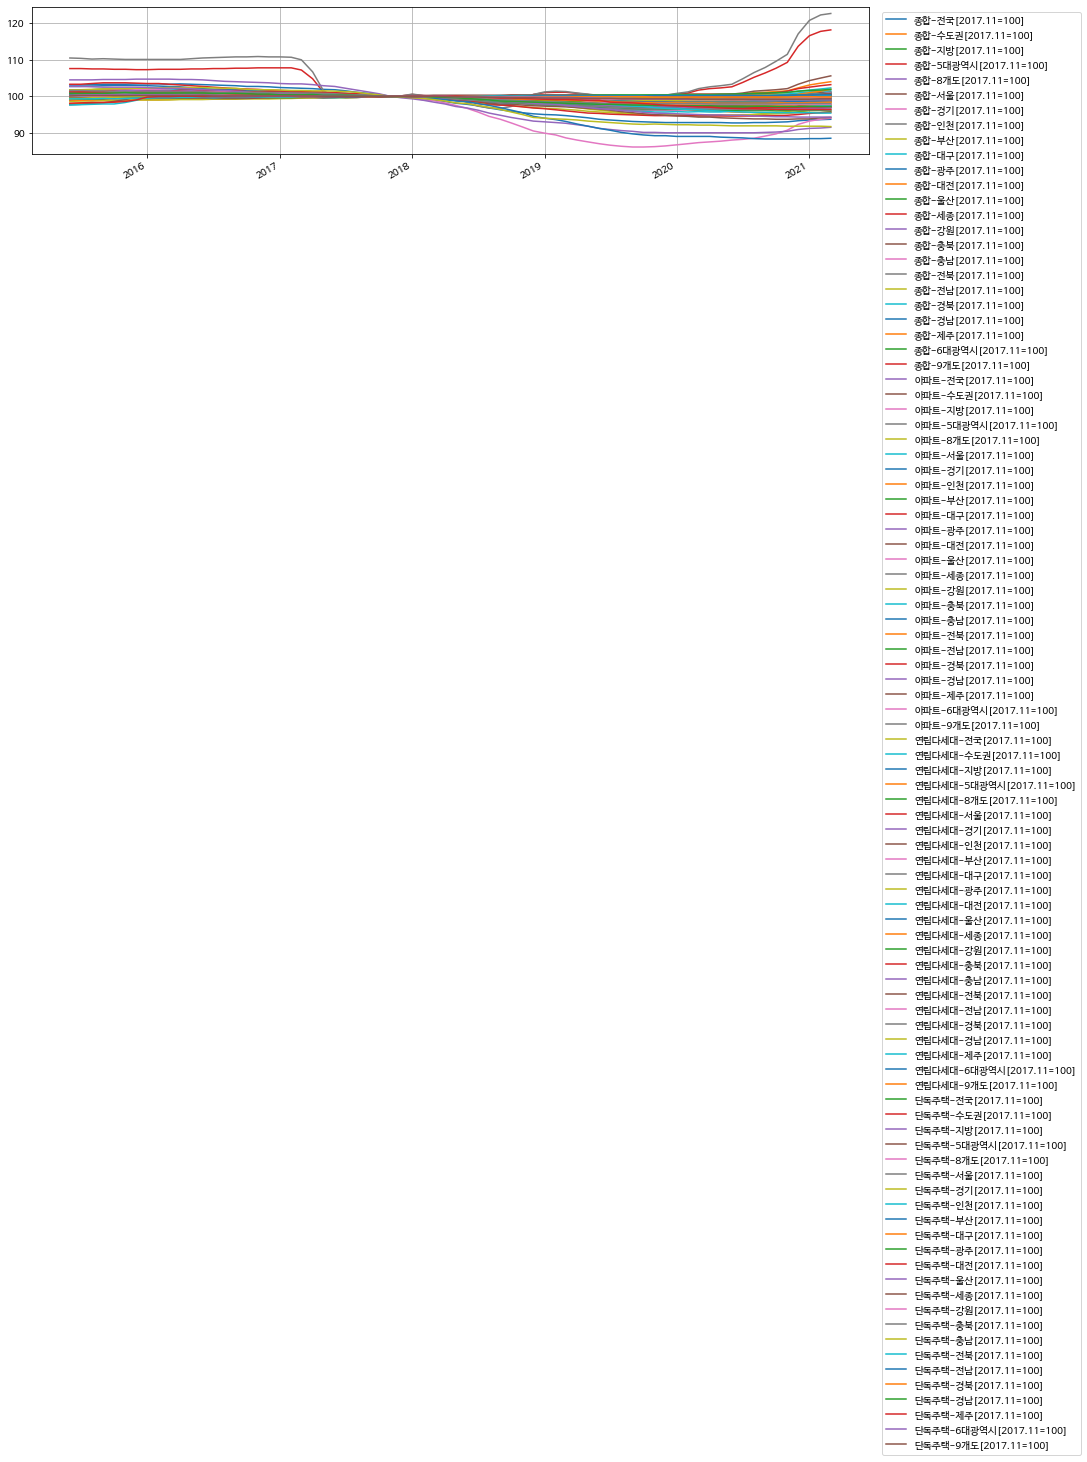

In [ ]:
show_graph(df_hmoney)


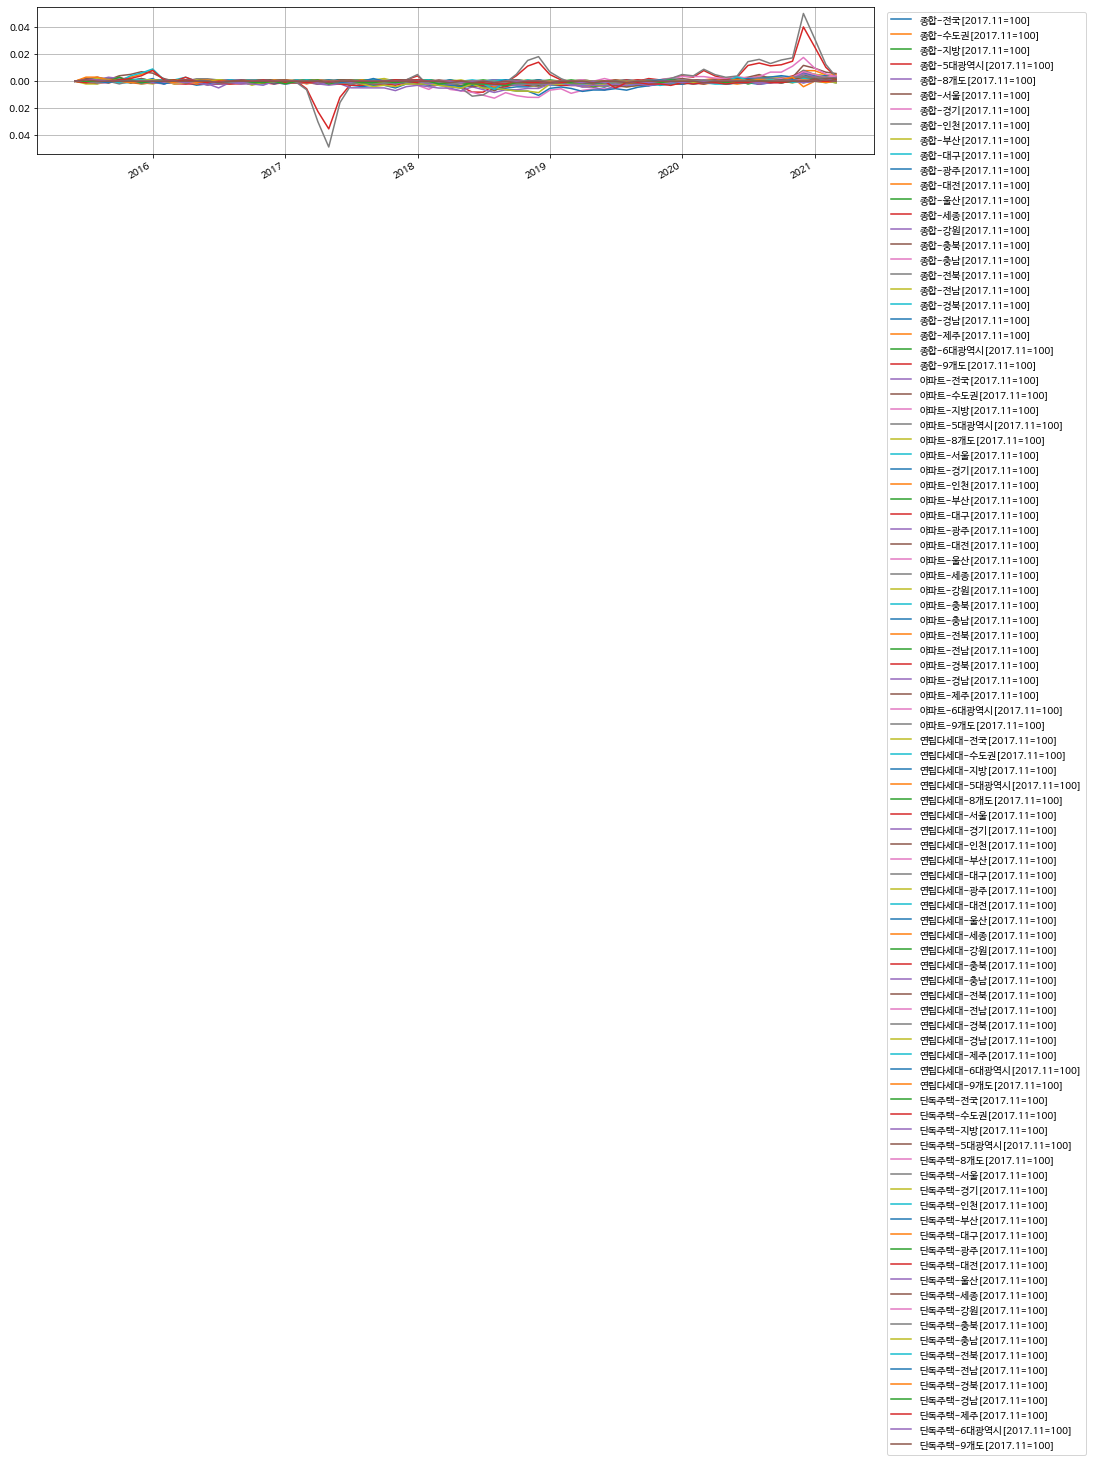

In [ ]:
month_change = get_ratio(df_hmoney)
show_graph2(df_hmoney, month_change)

전국 주택유형별 월세지수로 왔을 때, 아파트는 변동률이 상대적으로 큰 편이고, 나머지는 비슷한 양상입니다.



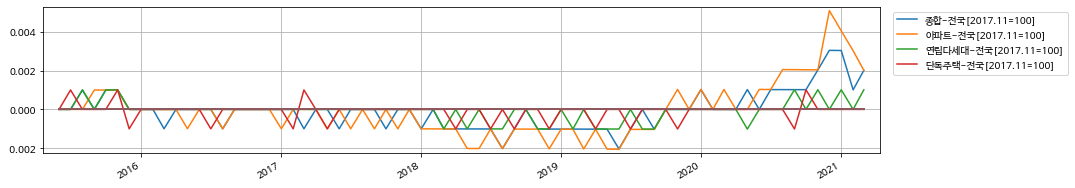

In [ ]:
cols_bytype = ['종합-전국[2017.11=100]', '아파트-전국[2017.11=100]', '연립다세대-전국[2017.11=100]', '단독주택-전국[2017.11=100]']

show_bytype(df_hmoney, cols_bytype, month_change)

지역별로 보면 아파트의 경우 세종시의 월세 변동률이 가장 큽니다.


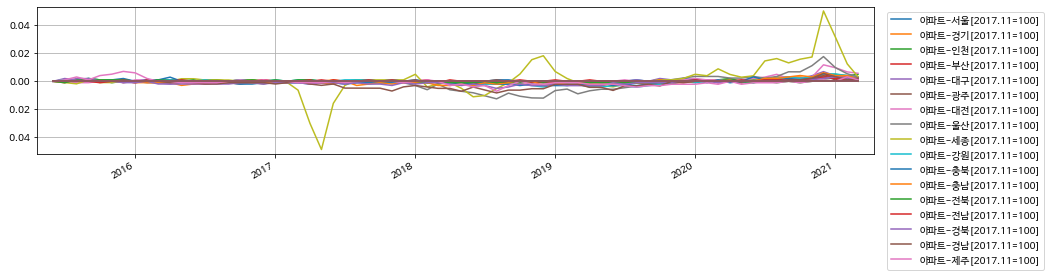

In [ ]:
cols_bytype = ['아파트-서울[2017.11=100]',
       '아파트-경기[2017.11=100]', '아파트-인천[2017.11=100]',
       '아파트-부산[2017.11=100]', '아파트-대구[2017.11=100]',
       '아파트-광주[2017.11=100]', '아파트-대전[2017.11=100]',
       '아파트-울산[2017.11=100]', '아파트-세종[2017.11=100]',
       '아파트-강원[2017.11=100]', '아파트-충북[2017.11=100]',
       '아파트-충남[2017.11=100]', '아파트-전북[2017.11=100]',
       '아파트-전남[2017.11=100]', '아파트-경북[2017.11=100]',
       '아파트-경남[2017.11=100]', '아파트-제주[2017.11=100]']

show_bytype(df_hmoney, cols_bytype, month_change)

아파트의 월세 변동폭이 0.05 ~ -0.05 인 것에 비해 연립다세대 월세 변동폭은 0.01 ~ -0.01로 상대적으로 낮은 편입니다.



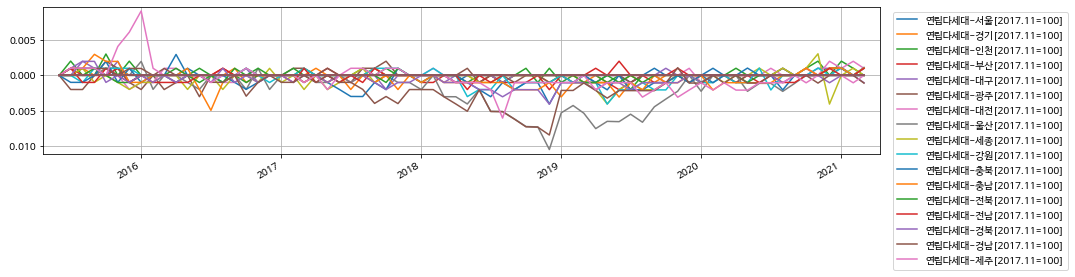

In [ ]:
cols_bytype = ['연립다세대-서울[2017.11=100]',
       '연립다세대-경기[2017.11=100]', '연립다세대-인천[2017.11=100]',
       '연립다세대-부산[2017.11=100]', '연립다세대-대구[2017.11=100]',
       '연립다세대-광주[2017.11=100]', '연립다세대-대전[2017.11=100]',
       '연립다세대-울산[2017.11=100]', '연립다세대-세종[2017.11=100]',
       '연립다세대-강원[2017.11=100]', '연립다세대-충북[2017.11=100]',
       '연립다세대-충남[2017.11=100]', '연립다세대-전북[2017.11=100]',
       '연립다세대-전남[2017.11=100]', '연립다세대-경북[2017.11=100]',
       '연립다세대-경남[2017.11=100]', '연립다세대-제주[2017.11=100]']

show_bytype(df_hmoney, cols_bytype, month_change)

단독주택 월세 변동폭은 0.08 ~ -0.06 정도로 변동폭이 가장 낮은 편입니다.



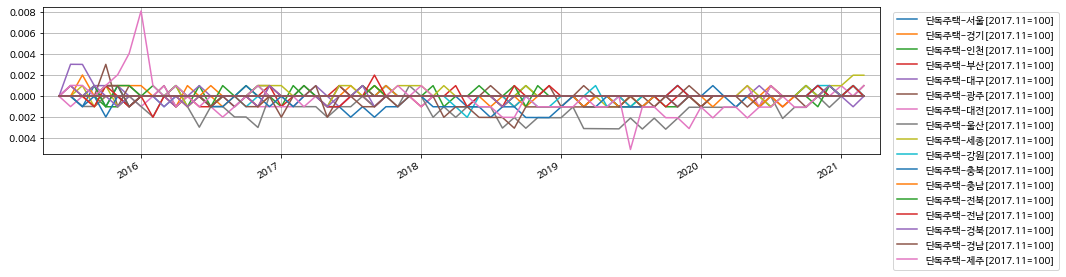

In [ ]:
cols_bytype = ['단독주택-서울[2017.11=100]',
       '단독주택-경기[2017.11=100]', '단독주택-인천[2017.11=100]',
       '단독주택-부산[2017.11=100]', '단독주택-대구[2017.11=100]',
       '단독주택-광주[2017.11=100]', '단독주택-대전[2017.11=100]',
       '단독주택-울산[2017.11=100]', '단독주택-세종[2017.11=100]',
       '단독주택-강원[2017.11=100]', '단독주택-충북[2017.11=100]',
       '단독주택-충남[2017.11=100]', '단독주택-전북[2017.11=100]',
       '단독주택-전남[2017.11=100]', '단독주택-경북[2017.11=100]',
       '단독주택-경남[2017.11=100]', '단독주택-제주[2017.11=100]']

show_bytype(df_hmoney, cols_bytype, month_change)

지역별 종합적으로 봤을 때 아파트의 영향으로 세종시의 변동폭이 굉장히 큽니다.



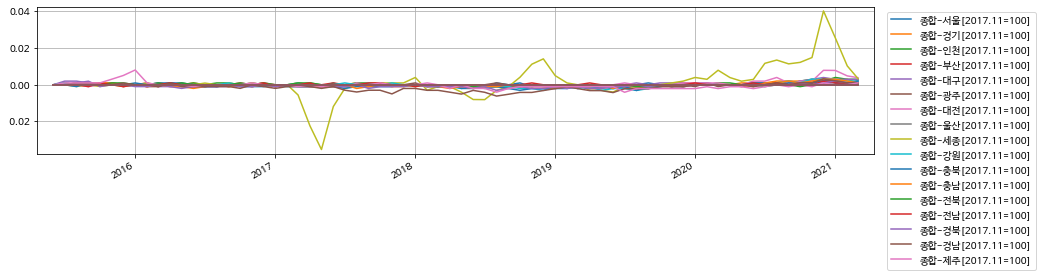

In [ ]:
cols_bytype = ['종합-서울[2017.11=100]', '종합-경기[2017.11=100]', '종합-인천[2017.11=100]',
'종합-부산[2017.11=100]', '종합-대구[2017.11=100]', '종합-광주[2017.11=100]',
'종합-대전[2017.11=100]', '종합-울산[2017.11=100]', '종합-세종[2017.11=100]',
'종합-강원[2017.11=100]', '종합-충북[2017.11=100]', '종합-충남[2017.11=100]',
'종합-전북[2017.11=100]', '종합-전남[2017.11=100]', '종합-경북[2017.11=100]',
'종합-경남[2017.11=100]', '종합-제주[2017.11=100]']

show_bytype(df_hmoney, cols_bytype, month_change)

## **허가 및 기타지수**

### **건축허가현황을 확인합니다**

연면적-철근·철골조, 연면적-자재별, 연면적-용도별 크기가 가장 큰 걸 확인할 수 있습니다.



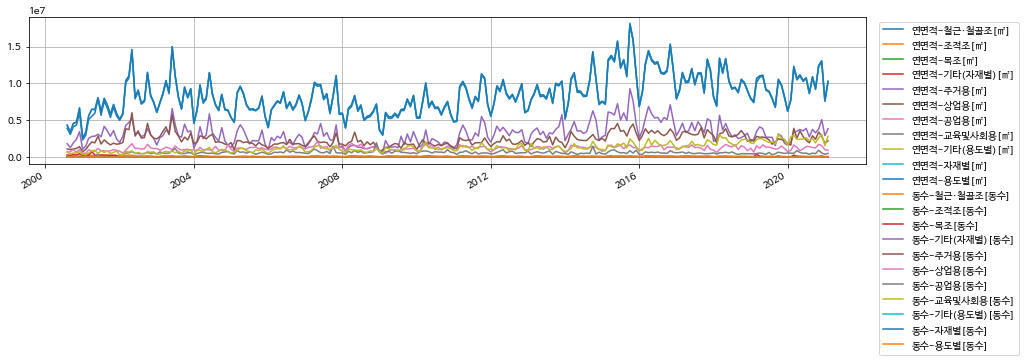

In [ ]:
show_graph(df_build)


### **주택건설인허가실적을 확인합니다.**
데이터의 변화를 볼 때 연간 누적치인 것 같습니다.


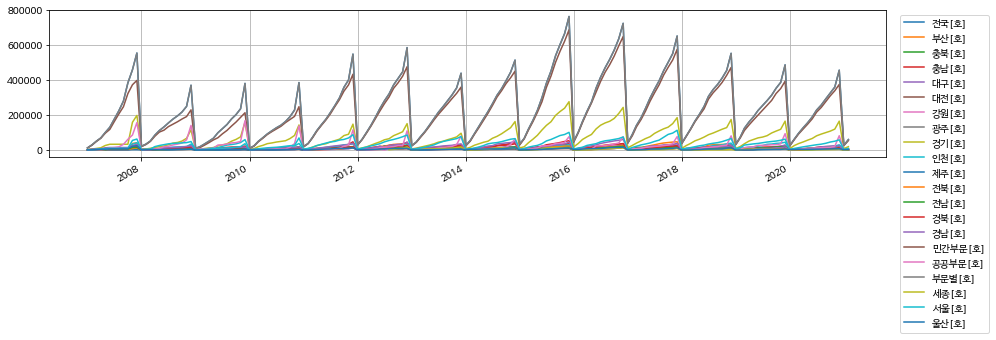

In [ ]:
show_graph(df_build2)


공공부문보다는 민간부문의 수요가 항상 큰 걸로 보입니다.



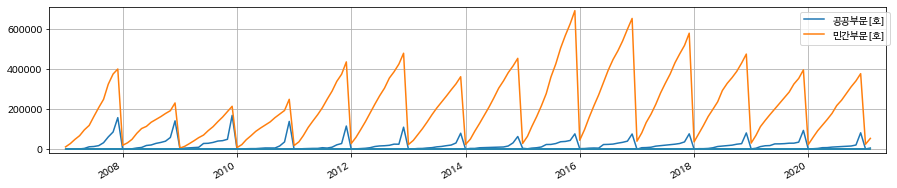

In [ ]:
cols_bytype = ['공공부문[호]','민간부문[호]']
show_bytype_og(df_build2, cols_bytype)

경기도의 인허가 실적이 가장 많고, 그 다음으로 서울의 인허가 실적이 많습니다.



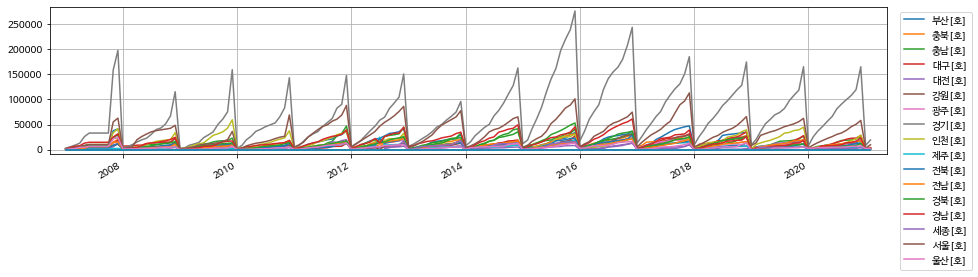

In [ ]:
cols_bytype = ['부산[호]', '충북[호]', '충남[호]', '대구[호]', '대전[호]', '강원[호]',
       '광주[호]', '경기[호]', '인천[호]', '제주[호]', '전북[호]', '전남[호]', '경북[호]',
       '경남[호]', '세종[호]', '서울[호]', '울산[호]']

show_bytype_og(df_build2, cols_bytype)

### **미분양주택현황을 확인합니다.**


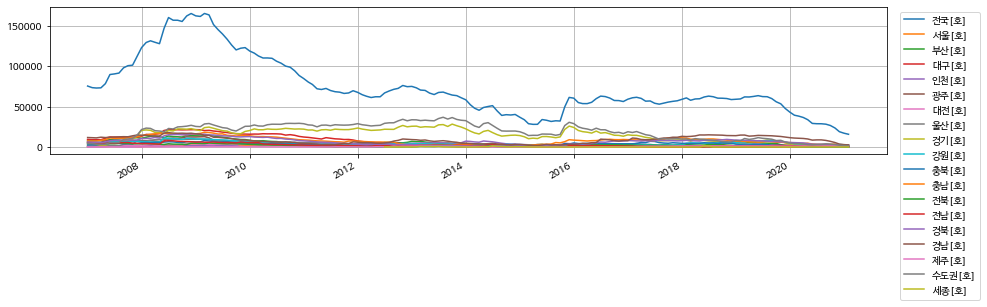

In [ ]:
show_graph(df_house)


2017년 말쯤 변동이 나타나는데 2017년부터 2018년까지를 살펴보면 다음과 같습니다.
2017년 초 수도권과 경기 지역의 미분양 주택이 가장 많다가 미분양이 줄면서 2018년 말에는 경남, 경북 지역의 미분양이 더 많아졌습니다

In [ ]:
# df_house.head()
df_house_sub = df_house.loc['2017-01-01':'2018-12-31']
df_house_sub = df_house_sub.drop('전국[호]', axis=1)
tuple_list_fst = []
tuple_list_lst = []
for i, col in enumerate(df_house_sub.columns):
  tuple_list_fst.append((col, df_house_sub.values[0][i]))
  tuple_list_lst.append((col, df_house_sub.values[-1][i]))
tuple_list_fst.sort(key=lambda x:-x[1])
tuple_list_lst.sort(key=lambda x:-x[1])
print('2017-01-01:',tuple_list_fst[:5])
print('2018-12-31:',tuple_list_lst[:5])
df_house_sub.head()

2017-01-01: [('수도권[호]', 18938.0), ('경기[호]', 15092.0), ('충남[호]', 9094.0), ('경북[호]', 8032.0), ('경남[호]', 7785.0)]
2018-12-31: [('경남[호]', 14147.0), ('경북[호]', 8995.0), ('충남[호]', 7763.0), ('수도권[호]', 6319.0), ('강원[호]', 5736.0)]


,서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
2017-01-01,205.0,1102.0,828.0,3641.0,818.0,551.0,682.0,15092.0,3466.0,4043.0,9094.0,2468.0,1153.0,8032.0,7785.0,353.0,18938.0,0.0
2017-02-01,187.0,1041.0,703.0,3335.0,764.0,726.0,811.0,14492.0,3281.0,3982.0,8970.0,2278.0,1145.0,7785.0,11117.0,446.0,18014.0,0.0
2017-03-01,200.0,959.0,627.0,4501.0,696.0,998.0,789.0,14465.0,3064.0,4415.0,8785.0,2087.0,1108.0,7538.0,10712.0,735.0,19166.0,0.0
2017-04-01,157.0,905.0,529.0,3703.0,1392.0,935.0,736.0,13309.0,3297.0,5755.0,8715.0,2130.0,1023.0,7472.0,9341.0,914.0,17169.0,0.0
2017-05-01,119.0,836.0,383.0,3158.0,1326.0,888.0,713.0,11958.0,3013.0,5433.0,8312.0,1956.0,979.0,7774.0,9040.0,971.0,15235.0,0.0


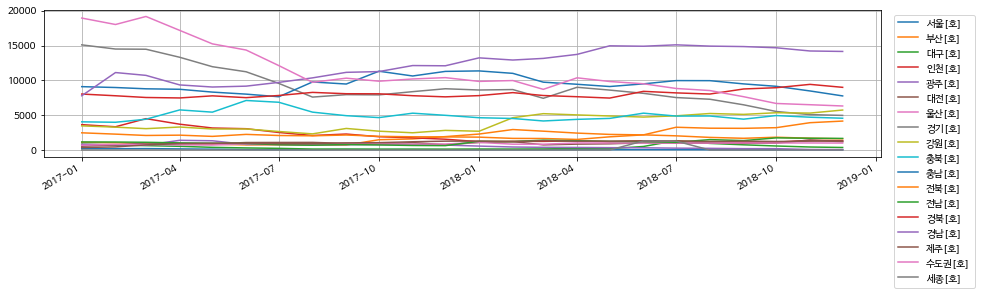

In [ ]:
show_graph(df_house_sub)


국토부의 규제지역 지정 자료를 봤을 때, 2017년 하반기에 수도권, 경기도 규제지역 지정이 많아지면서 수도권과 경기도 미분양 주택들에 대한 수요가 늘어난 걸로 보입니다.



In [ ]:
# 국토부 자료 참조
# https://www.molit.go.kr/USR/NEWS/m_71/dtl.jsp?lcmspage=1&id=95084918
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 다운로드.png to 다운로드.png
User uploaded file "다운로드.png" with length 228723 bytes


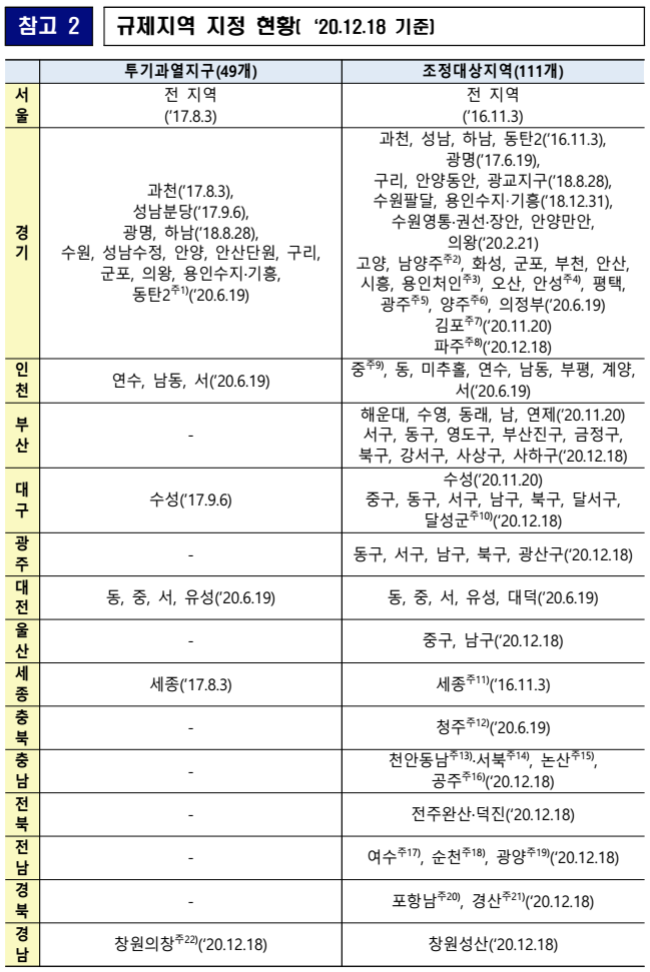

In [ ]:
from IPython.display import Image
Image('다운로드.png')

### **국내건설수주액을 확인합니다**

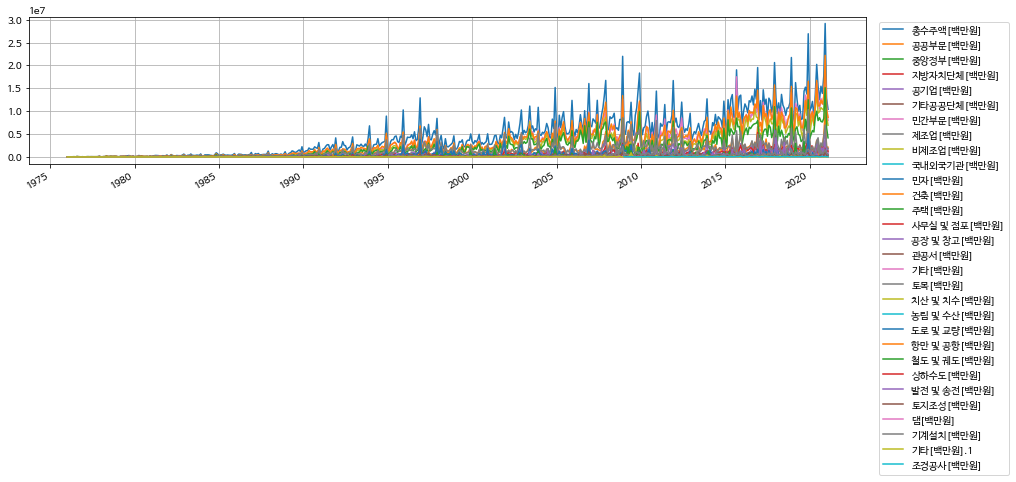

In [ ]:
show_graph(df_money)


건설수주액은 민간부문이 공공부문보다 크지만, 월마다의 수주액 변동폭은 공공부문이 더 큽니다.
민간부문은 지속적인 수요가 있지만, 공공부문은 정책 변경 등의 요건에 따라 수요가 달라져서 그렇지 않을까 싶습니다.

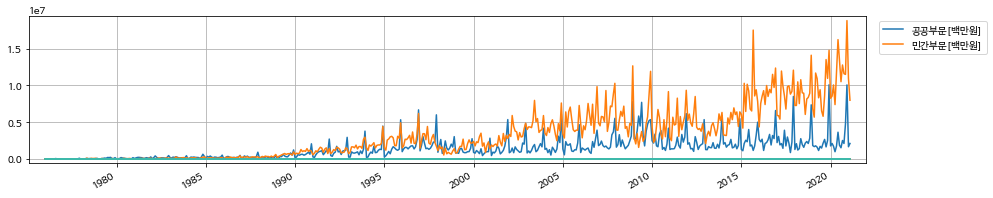

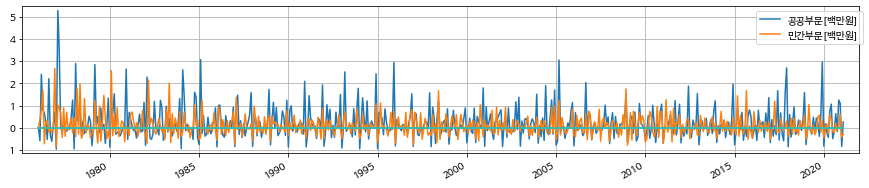

In [ ]:
# 변동률 계산
build_change = get_ratio(df_money)
cols_bytype = ['공공부문[백만원]','민간부문[백만원]']

show_bytype_og(df_money, cols_bytype)
show_bytype(df_money, cols_bytype, build_change)

건설수주액은 비제조업이 제조업보다 크지만, 월마다의 수주액 변동폭은 80년 이후로 봤을 때 제조업이 더 큽니다.



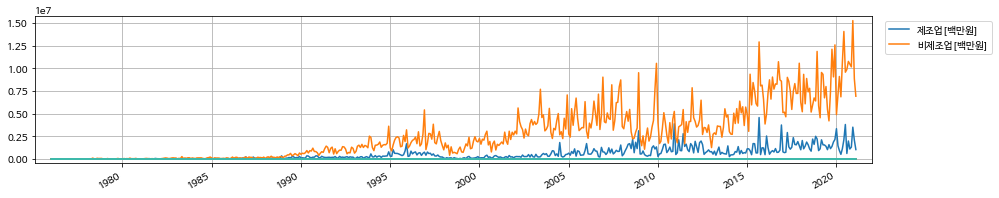

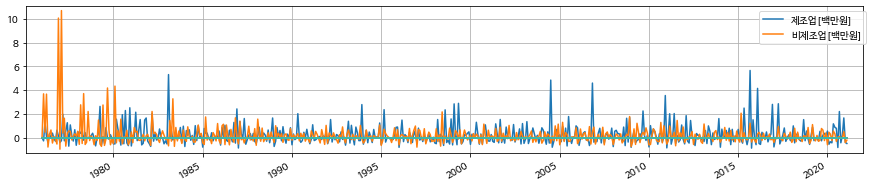

In [ ]:
cols_bytype = ['제조업[백만원]', '비제조업[백만원]']

show_bytype_og(df_money, cols_bytype)
show_bytype(df_money, cols_bytype, build_change)

기반시설의 경우 도로 및 교량, 댐, 철도 및 궤도를 제외하면 수주액이 상대적으로 적은 편입니다.



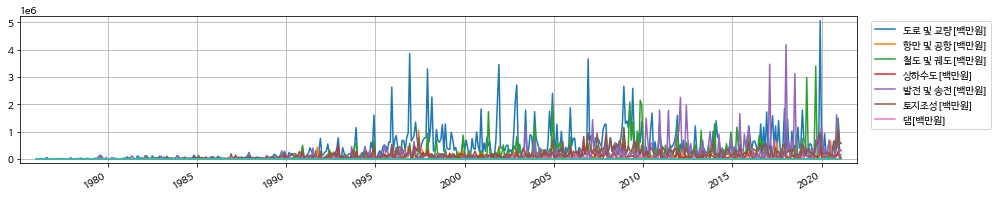

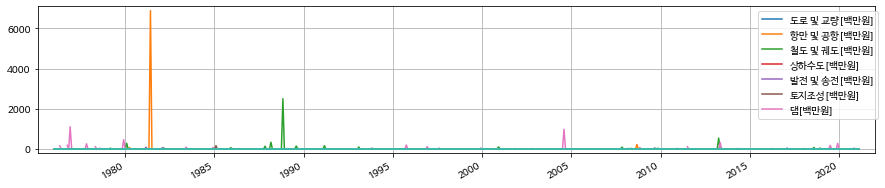

In [ ]:
cols_bytype = ['도로 및 교량[백만원]', '항만 및 공항[백만원]', '철도 및 궤도[백만원]', '상하수도[백만원]',
       '발전 및 송전[백만원]', '토지조성[백만원]', '댐[백만원]']

show_bytype_og(df_money, cols_bytype)
show_bytype(df_money, cols_bytype, build_change)

[Dacon, 이산님의 코드](https://dacon.io/competitions/official/235724/codeshare/2587?page=1&dtype=recent) 를 참고하여 학습용으로 작성하였음

